# Iris Flower Classification using machine learning¶
Step 1: Problem defination

step 2: Data collection and pre-processing

step 3: EDA

step 4: Data encoding

Step 5: Machine learning model implementation and evaluation

step 6: Experimentation

# 1 Problem Defination
The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

# 2 Data Collection and pre-processing
For the dataset i am going to use the following dataset:https://www.kaggle.com/datasets/arshid/iris-flower-dataset

# 2.1 Pre-processing

In [71]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# importing evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

In [3]:
# load the dataset
iris_df=pd.read_csv('IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check if there is any null values in the data or not
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

It seems there are no empty data

# 3 EDA

Lets dive into the data

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# let's see the number of species of flower in the dataset
iris_df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

It seems the data is normally distributed.

let's visualize 

<AxesSubplot:>

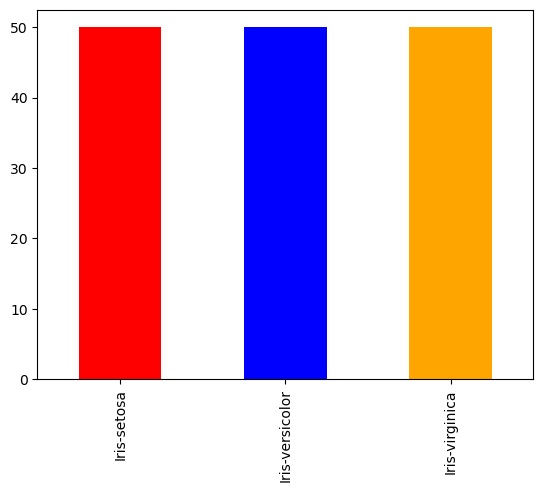

In [7]:
iris_df.species.value_counts().plot(kind='bar', color=['red','blue','orange'])

In [26]:
# function to plot distribution of data in the features
def plotHistogram(feature):
    print(f"Histogram for {feature}")
    plt.hist(iris_df[feature], edgecolor='white')
    plt.xlabel(feature)
    plt.ylabel('Number of frequency')
    plt.title(f"{feature} distribution")
    plt.show()
    return plotHistogram

Histogram for sepal_length


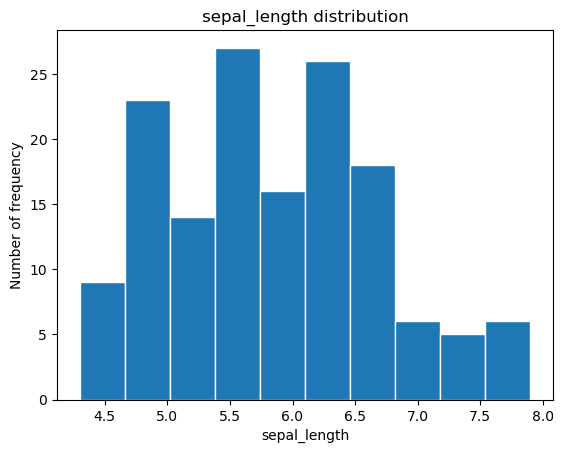

<function __main__.plotHistogram(feature)>

In [27]:
plotHistogram('sepal_length')

Histogram for sepal_width


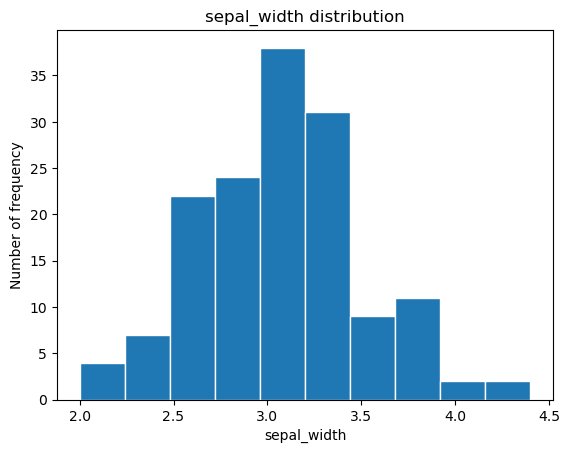

<function __main__.plotHistogram(feature)>

In [28]:
plotHistogram('sepal_width')

Histogram for petal_length


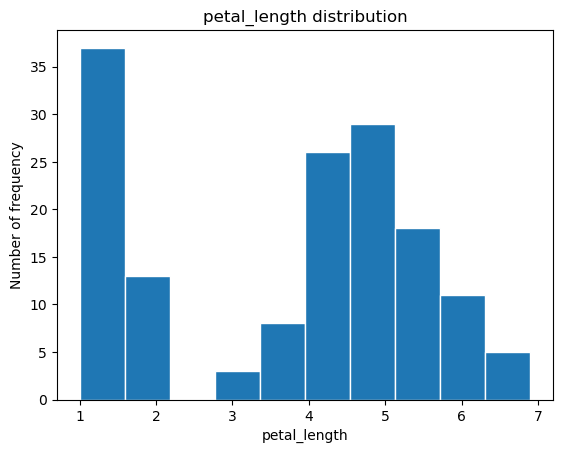

<function __main__.plotHistogram(feature)>

In [29]:
plotHistogram('petal_length')

Histogram for petal_width


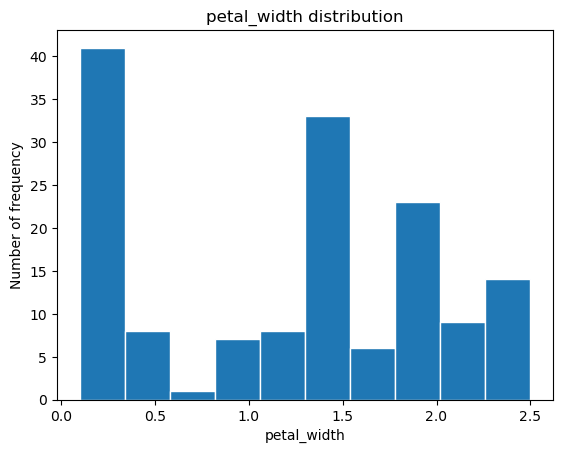

<function __main__.plotHistogram(feature)>

In [30]:
plotHistogram('petal_width')

In [32]:
# let's check for any outliers in the data
def boxPlot(feature, iris_df):
    sns.boxplot(x=iris_df[feature])
    return boxPlot

<function __main__.boxPlot(feature, iris_df)>

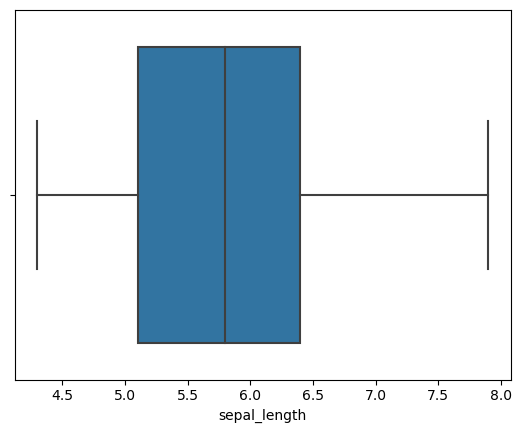

In [33]:
boxPlot('sepal_length',iris_df)

<function __main__.boxPlot(feature, iris_df)>

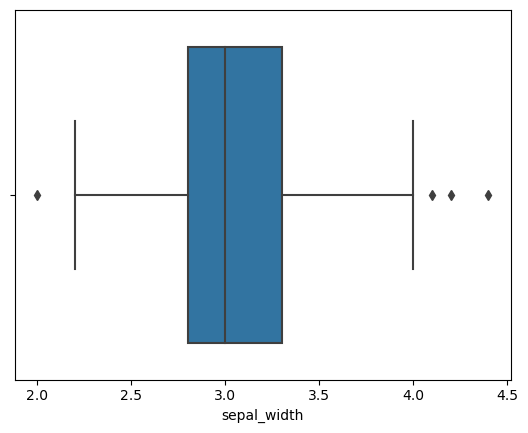

In [34]:
boxPlot('sepal_width',iris_df)

<function __main__.boxPlot(feature, iris_df)>

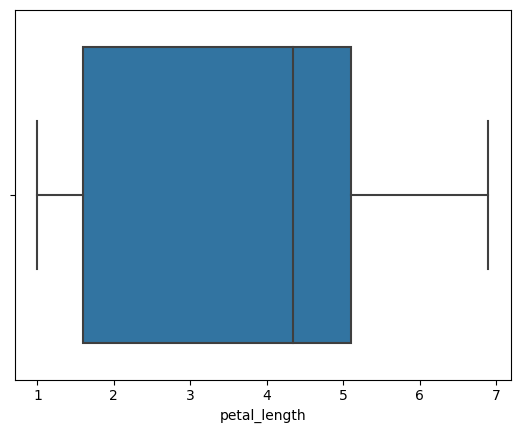

In [35]:
boxPlot('petal_length',iris_df)

<function __main__.boxPlot(feature, iris_df)>

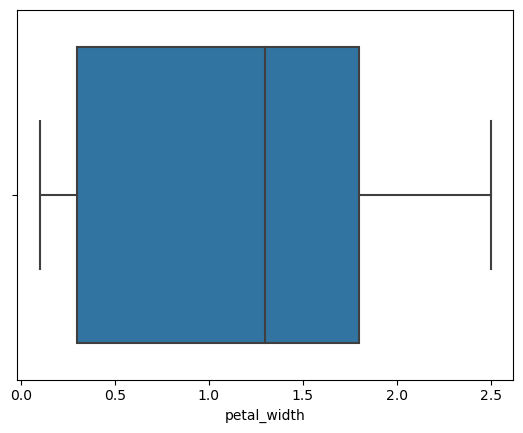

In [36]:
boxPlot('petal_width',iris_df)

In [43]:
# function to plot boxplot using two features
def twoFeaturesBoxplot(feature,iris_df):
    sns.boxplot(y=iris_df['species'],x=iris_df[feature]).set(title='Boxplot')
    return twoFeaturesBoxplot

<function __main__.twoFeaturesBoxplot(feature, iris_df)>

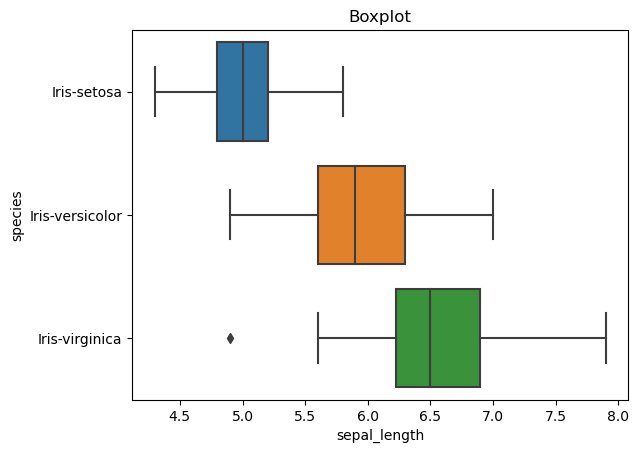

In [44]:
twoFeaturesBoxplot('sepal_length',iris_df)

<function __main__.twoFeaturesBoxplot(feature, iris_df)>

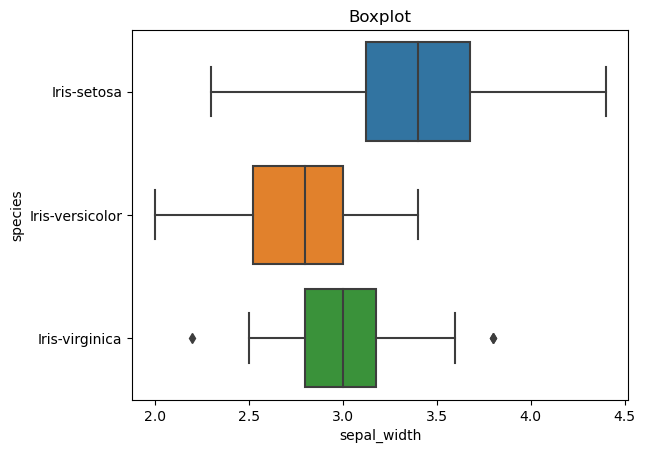

In [45]:
twoFeaturesBoxplot('sepal_width',iris_df)

<function __main__.twoFeaturesBoxplot(feature, iris_df)>

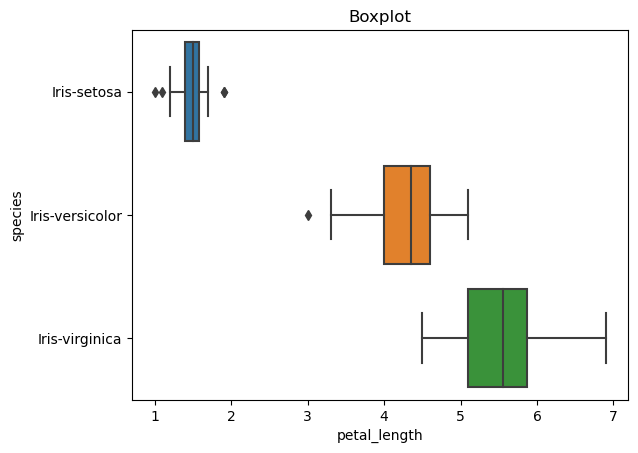

In [47]:
twoFeaturesBoxplot('petal_length',iris_df)

<function __main__.twoFeaturesBoxplot(feature, iris_df)>

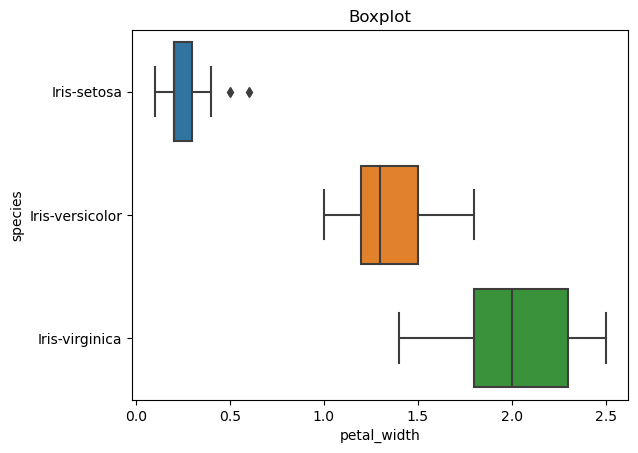

In [48]:
twoFeaturesBoxplot('petal_width',iris_df)

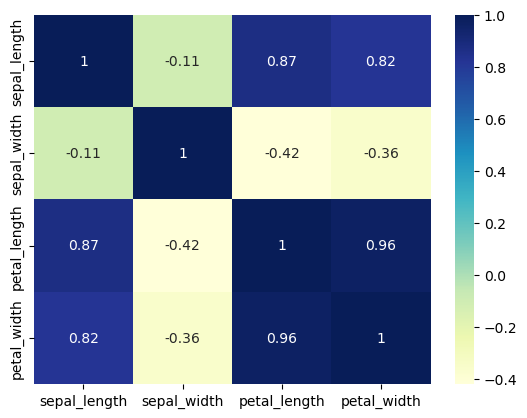

In [54]:
# plotting correlation heatmaps to find the correaltion between features
dataplot = sns.heatmap(iris_df.corr(),cmap="YlGnBu", annot=True) 
  

It seems that most if the features are highly correlated with each other where as some feature in yellow color are negatively correlated

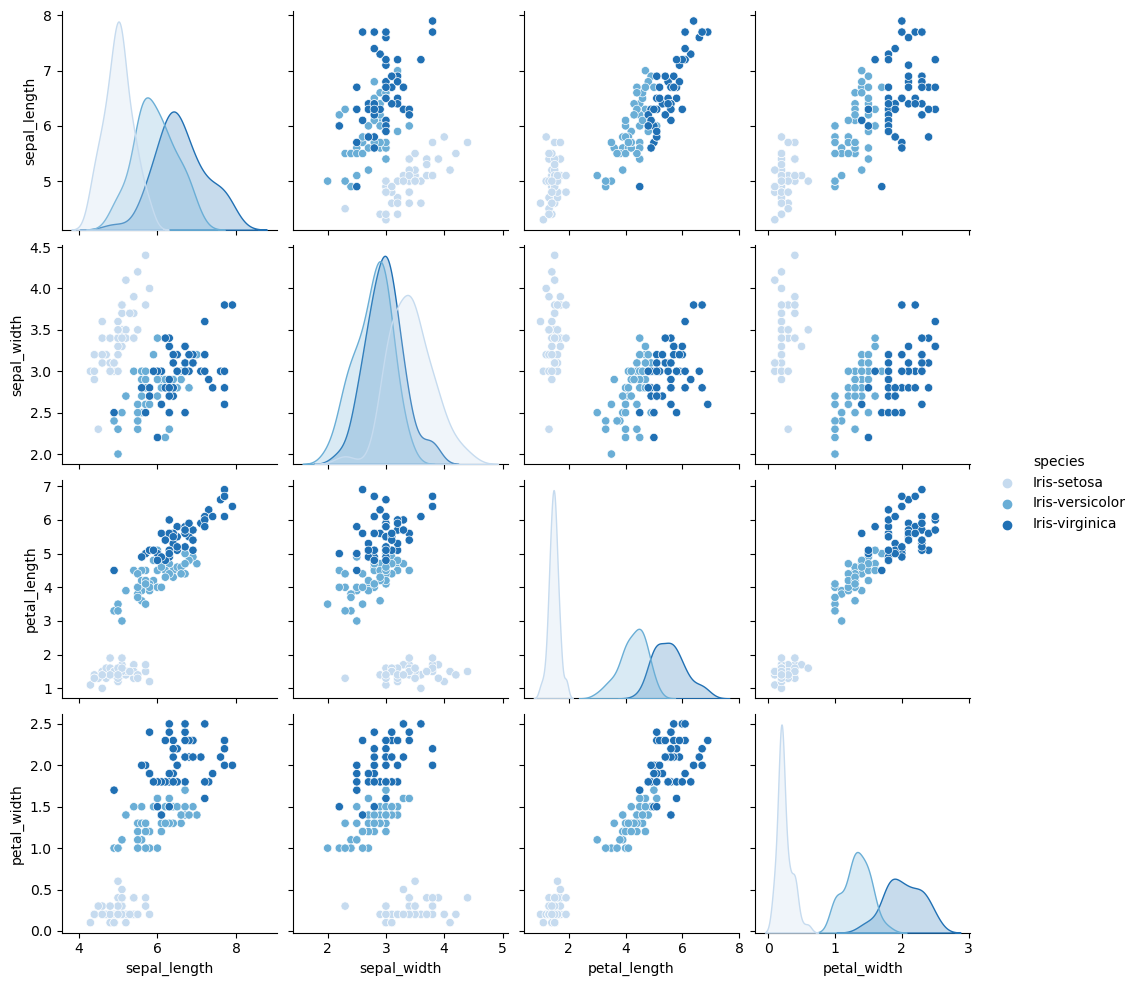

In [62]:
# plotting pairplot to find any pattern in the data
sns.pairplot(iris_df, hue='species', palette='Blues')

# 4 Data encoding

Encoding the categorical feature in the dataset

In [55]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [56]:
# Splitting the data into X and y
X=iris_df.drop("species", axis=1)
y=iris_df['species']

In [59]:
# using one hot encoding to encode the categorical data
# categorical_features=['species']
# one_hot=OneHotEncoder()
# transformer=ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
# transformed_X=transformer.fit_transform(X)
# transformed_X

# 5 Machine learning model implementation and evaluation

In [61]:
# Splitting the data into train and test set
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Here i am going to implement and compare three classification models they are listed below:
    
    1. RandomForestClassifier()
    
    2. Support Vector Machine()
    
    3. Logistic Regression()

In [63]:
models={'Logistic Regression':LogisticRegression(),
        'Random Forest Classifier':RandomForestClassifier(),
       'Support Vector Machine':SVC()}

In [72]:
# create a function to fit and score models
def fit_and_score(models, X_train,X_test, y_train, y_test):
    # set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name,model in models.items():
        # Fit the model
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
#         save the trained model to use it later using joblib library
        model_filename = f"{name}_model.pkl"
        joblib.dump(model, model_filename)
        print(f"Model {name} saved as {model_filename}")
        
        #Evaluate the model and append its score
        print(f"Evaluating {name}....")
        print(classification_report(y_test,y_pred))
        
#         Saving the model scores in the dictionary
        model_scores[name]={'model': model, 'classification_report': classification_report(y_test, y_pred)}
    return model_scores

In [73]:
model_scores=fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=y_train ,y_test=y_test)
model_scores

Model Logistic Regression saved as Logistic Regression_model.pkl
Evaluating Logistic Regression....
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Model Random Forest Classifier saved as Random Forest Classifier_model.pkl
Evaluating Random Forest Classifier....
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00   

{'Logistic Regression': {'model': LogisticRegression(),
  'classification_report': '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'},
 'Random Forest Classifier': {'model': RandomForestClassifier(),
  'classification_report': '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\

It seems all models are giving 100% accuracy

# let's test it out with some random data
since all of the model were performing very well for now i am going to test the RandomforestClassfier()

In [74]:
# load the trained randomforest model
model=joblib.load('Random Forest Classifier_model.pkl')

# function to predict flower class
def classifiy_Flower():
    print("Enter the details of the flower:")
    sepal_length=int(input("Enter the sepal length of the flower: "))
    sepal_width=int(input("Enter the sepal width of the flower: "))
    petal_length=int(input("Enter the petal length of the flower: "))
    petal_width=int(input("Enter the petal width of the flower: "))
    
    # make prediction 
    input_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(input_features)
    
    # printing the output
    if prediction == 0:
        flower_class = 'Setosa'
    elif prediction == 1:
        flower_class = 'Versicolor'
    else:
        flower_class = 'Virginica'

    print(f"The predicted flower class is {flower_class}")

In [75]:
classifiy_Flower()

Enter the details of the flower:
Enter the sepal length of the flower: 2
Enter the sepal width of the flower: 1
Enter the petal length of the flower: 3
Enter the petal width of the flower: 4
The predicted flower class is Virginica


C:\Users\grgro\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
